![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

(7787, 11)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')
['International TV' 'Dramas' 'Horror Movies' 'Action' 'Crime TV'
 'Documentaries' 'Independent Movies' 'Comedies' 'Sports Movies'
 'Anime Series' 'Reality TV' 'TV Comedies' 'Docuseries' 'Uncategorized'
 'British TV' 'International Movies' 'Sci-Fi' 'Kids' 'Children' 'TV Shows'
 'Classic Movies' 'Thrillers' 'Stand-Up' 'Anime Features' 'Music'
 'TV Dramas' 'TV Horror' 'TV Action' 'Classic' 'Romantic TV' 'Cult Movies'
 'TV Sci' 'Romantic Movies' 'Spanish-Language' 'LGBTQ Movies']
['International TV' 'Dramas' 'Horror Movies' 'Action' 'Crime TV'
 'Documentaries' 'Independent Movies' 'Comedies' 'Sports Movies'
 'Anime Series' 'Reality TV' 'TV Comedies' 'Docuseries' 'Uncategorized'
 'British TV' 'International Movies' 'Sci-Fi' 'Kids' 'Children' 'TV Shows'
 'Classic Movies' 'Thrillers' 'Stand-Up' 'Anime Features' 'Music'
 'T

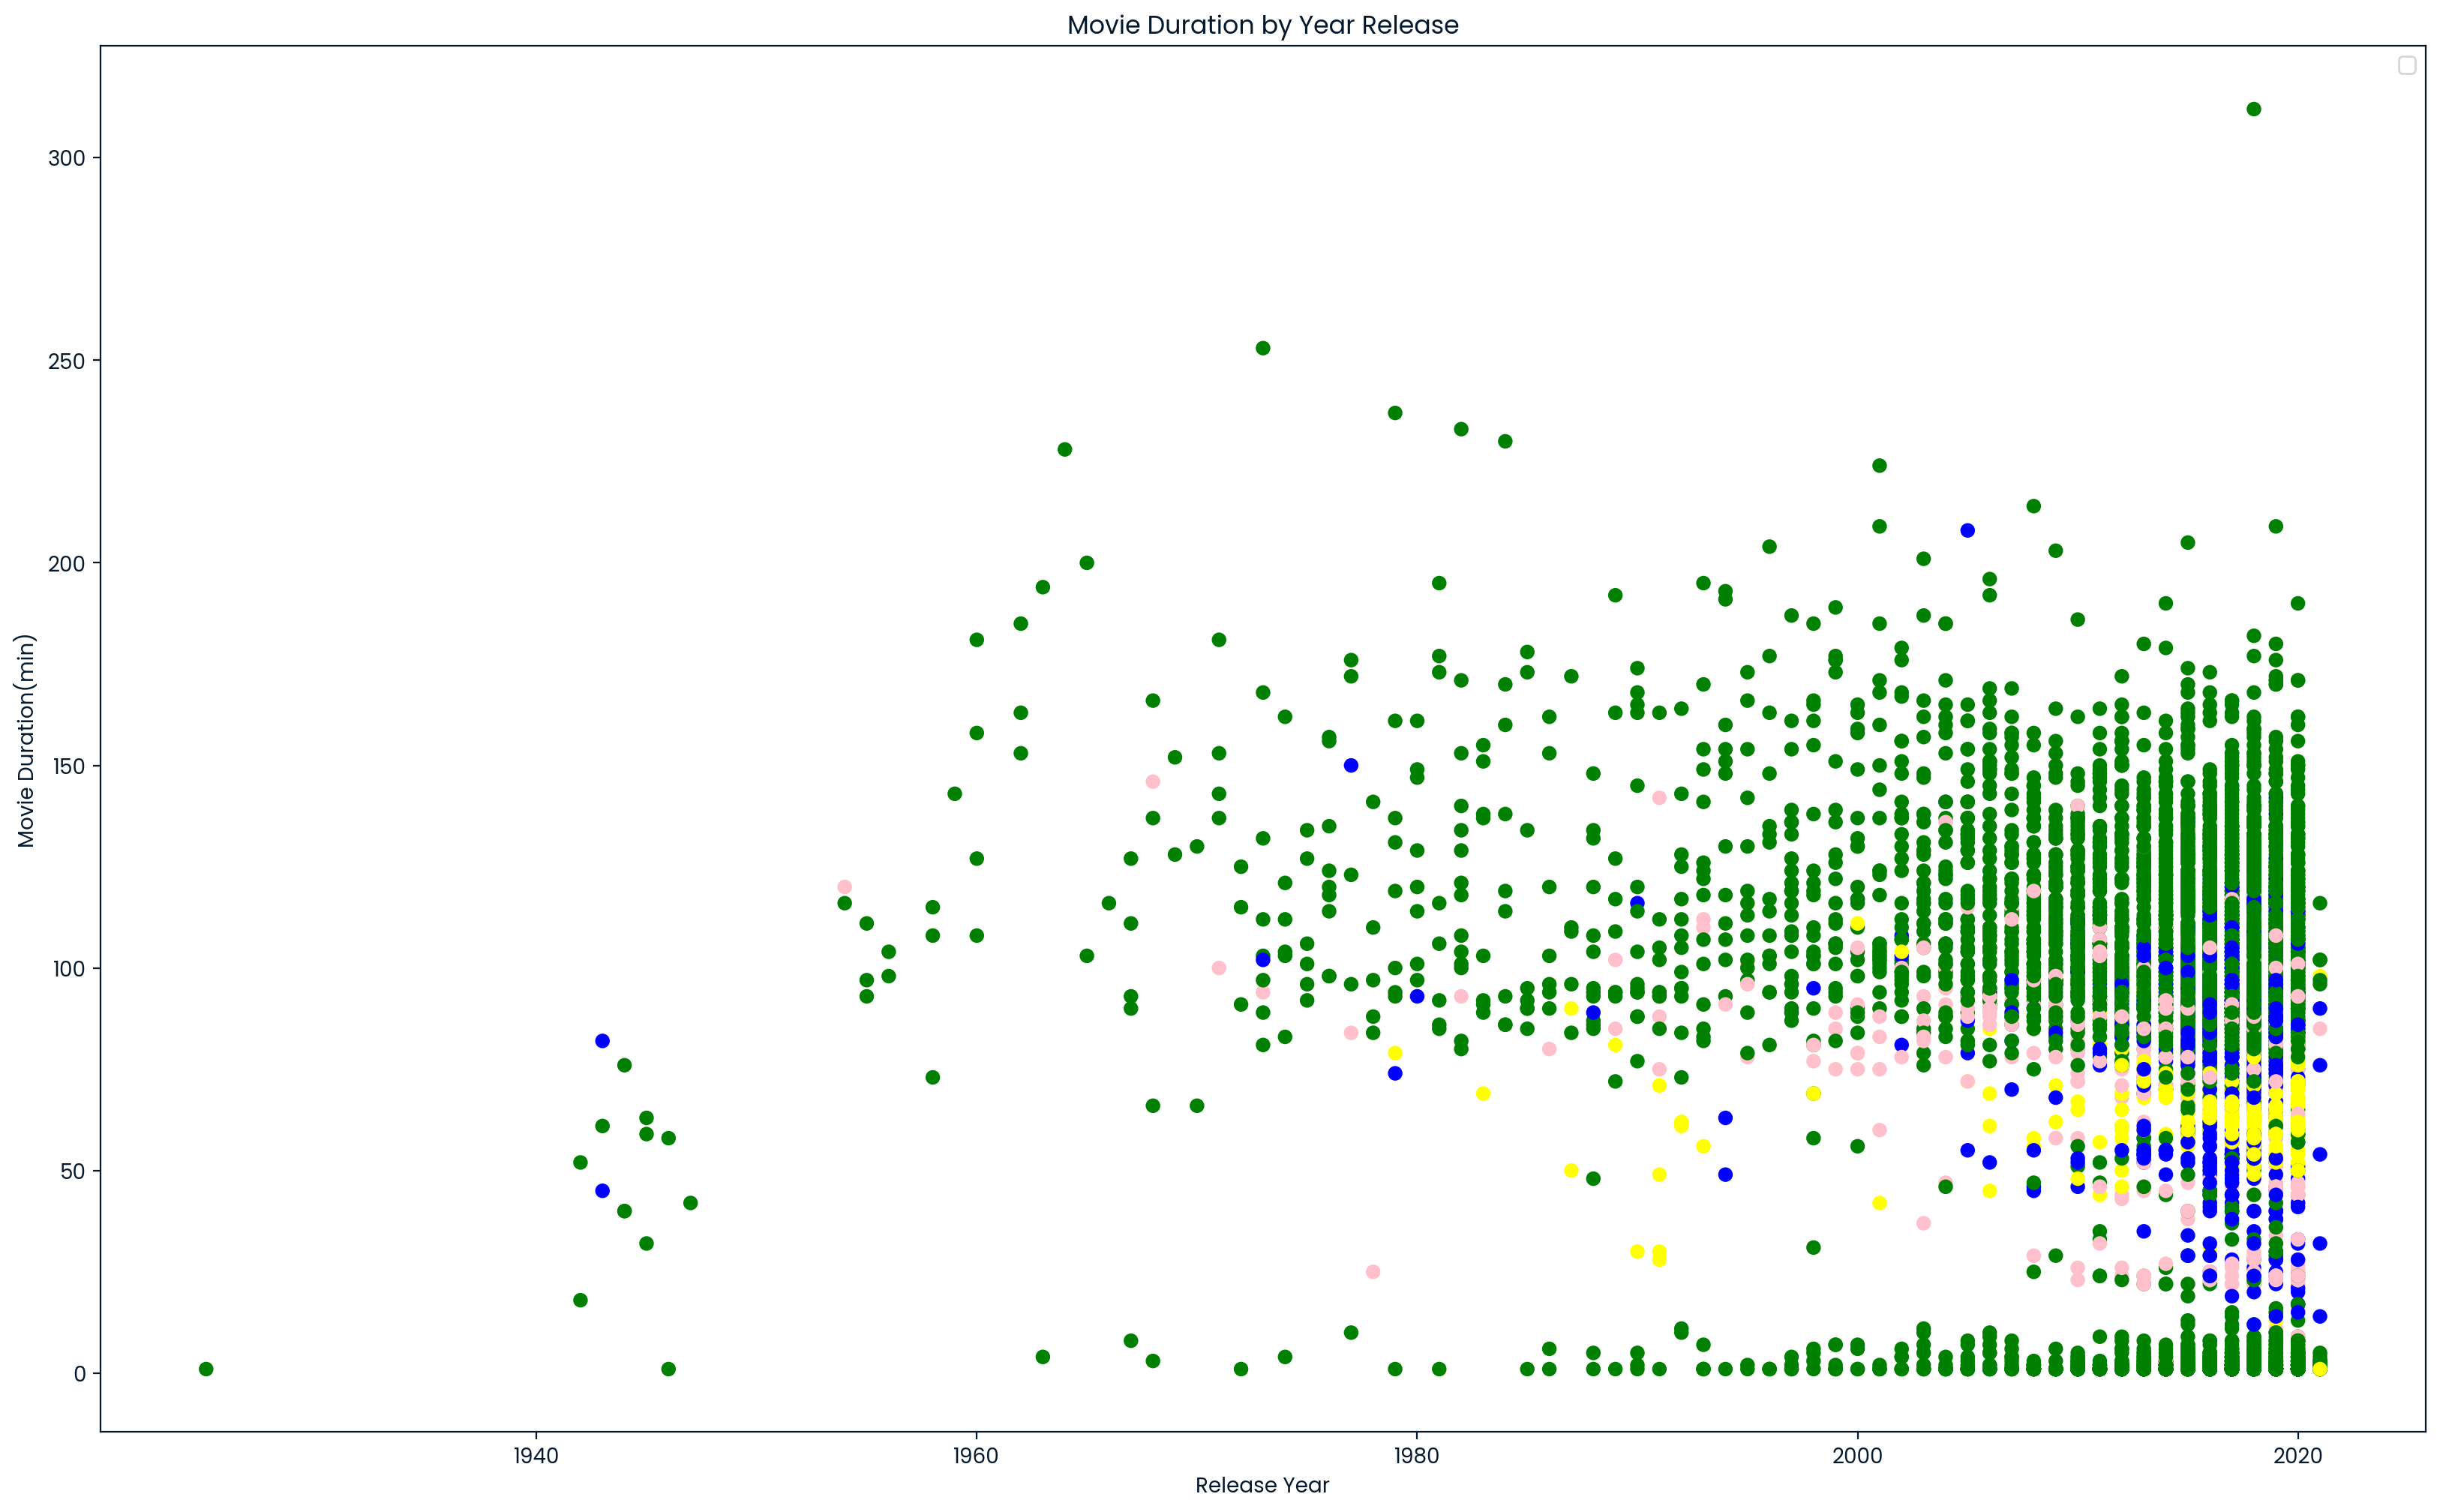

no


In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt


#Loading the Netflix Dataset
netflix_df = pd.read_csv('netflix_data.csv');

#Understanding the Data
print(netflix_df.shape)
print(netflix_df.columns)

#Further exploring the genre to understand the movies
print(netflix_df['genre'].unique())

#Subsetting to remove 'TV Shows'
netflix_subset = netflix_df[netflix_df['type'] != 'TV Shows']

print(netflix_subset['genre'].unique())

#Filtering to specific columns required
netflix_movies = netflix_subset[['title','country','genre','release_year','duration']];

print(netflix_movies.head())

# Filtering short movies (Considering movies shorter than 60 minutes)
short_movies = netflix_movies[netflix_movies.duration < 60]

print(short_movies.head())

colors= []

for label, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append("pink")
    elif row['genre'] == 'Documentaries':
        colors.append("blue")
    elif row['genre'] == 'Stand-Up':
        colors.append("yellow")
    else:
        colors.append("green")


colors[:10]

# Plotting the movies release year vs duration. 
fid = plt.figure(figsize = (20,12))

plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c = colors)
plt.xlabel('Release Year')
plt.ylabel('Movie Duration(min)')
plt.title("Movie Duration by Year Release")
plt.legend()

plt.show()



long_movies = netflix_movies[netflix_movies.duration >= 60]

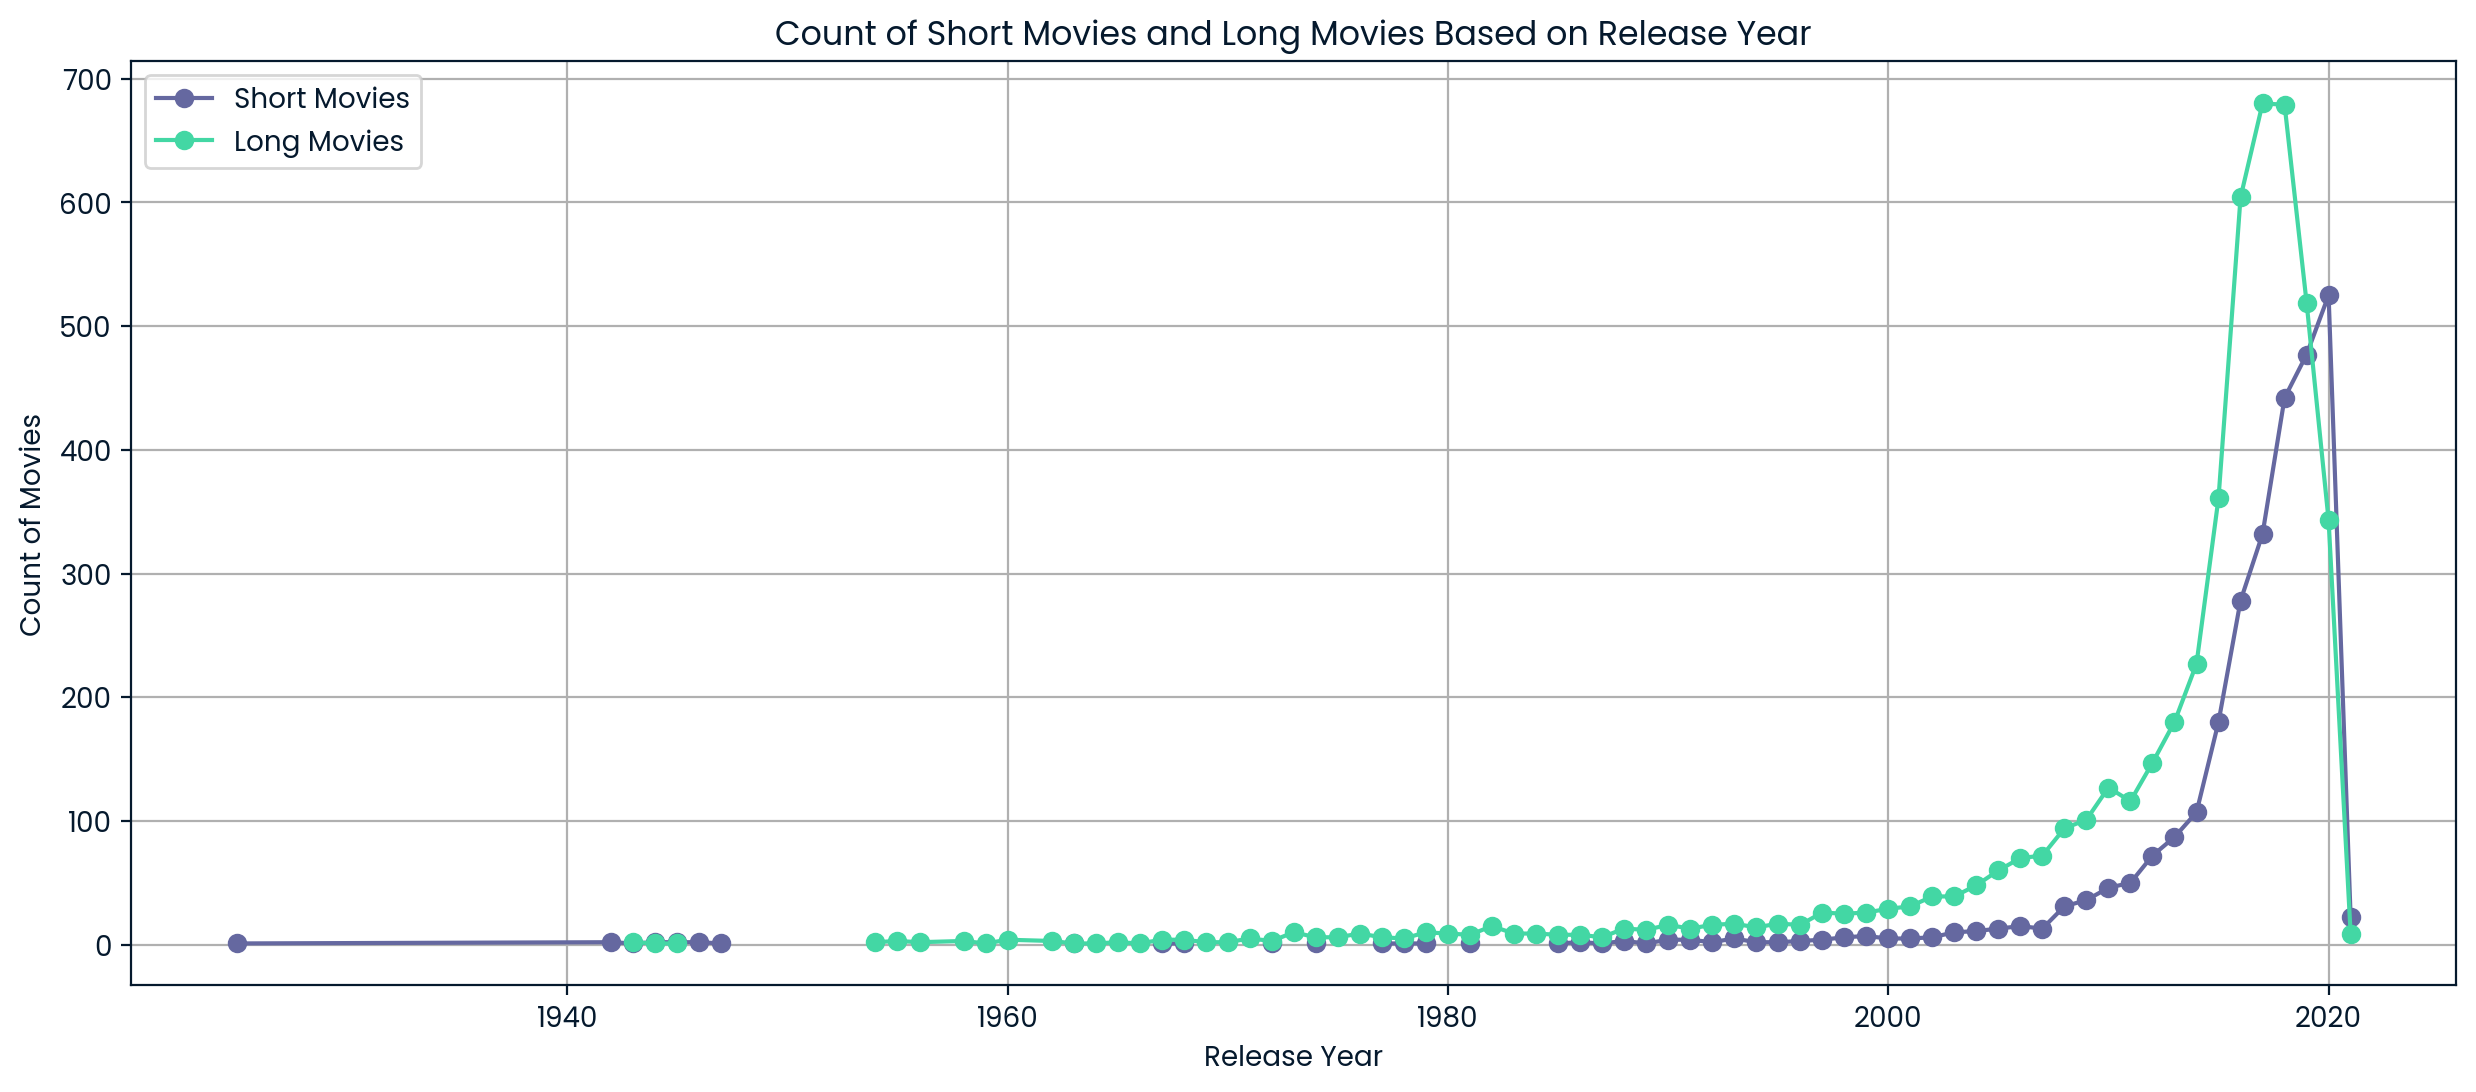

In [2]:

# Group by 'Release Year' and count the number of short movies and long movies
short_movie_counts = short_movies.groupby('release_year').size()
long_movie_counts = long_movies.groupby('release_year').size()

# Combine the counts into a single DataFrame
movie_counts = pd.DataFrame({
    'Short Movies': short_movie_counts,
    'Long Movies': long_movie_counts
})

# Step 5: Create line plots for short movies and long movies
plt.figure(figsize=(15, 6))
plt.plot(movie_counts.index, movie_counts['Short Movies'], label='Short Movies', marker='o', linestyle='-')
plt.plot(movie_counts.index, movie_counts['Long Movies'], label='Long Movies', marker='o', linestyle='-')
plt.title('Count of Short Movies and Long Movies Based on Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count of Movies')
plt.legend()
plt.grid(True)
plt.show()



We can see from the above line plot that until year 2019, we had more long movies than short movies. However, the trend changes from 2020 onwards, where we have more short movies than long movies.